In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

### 테스트용 이미지 만들기 함수

In [2]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text = 'ABCDE', org = (50,300),
                fontFace=font, fontScale=5, color = (255,255,255),
                thickness=25, lineType = cv2.LINE_AA)
    return blank_img

### 이미지를 디스플레이 하는 함수

In [3]:
def display_img(img):
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

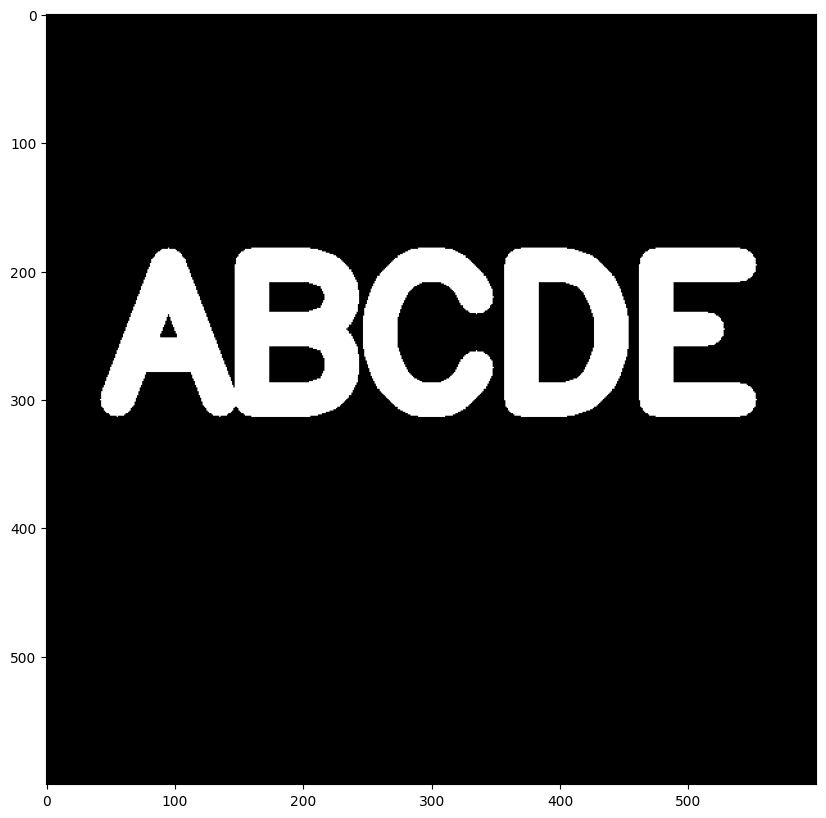

In [4]:
img = load_img()
display_img(img)

### Kernel 만들기

In [5]:
kernel = np.ones((5,5), dtype = np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

### 여러번 돌면서 침식

cv2.erode(src, kernel, dst = None, anchor = None, iteratons = None, borderType = None, borderValue = None) -> dst

- src : 입력 영상
- kernel : 구조 요소 getStructingElement()함수에 의해 생성 가능 , 만약 None을 지정하면 3x3 사각형 구성 요소를 사용
- dst : 출력 영상. src와 동일한 크기와 타입
- anchor : 고정점 위치. 기본값 (-1,1)을 사용하면 중앙점을 사용
- iterations : 반복 횟수, 기본값은 1
- borderType : 가장자리 픽셀 확장 방식. 기본값은 cv2.BORDER_CONSTANT
- borderValue : cv2.BORDER_CONSTANT인 경우, 확장된 가장자리 픽셀을 채울 값

*** kernel이 커지면 커질수록 적용되는 침식 효과가 커진다 ***


In [6]:
iterations = 5
result = cv2.erode(img, kernel, iterations=iterations)

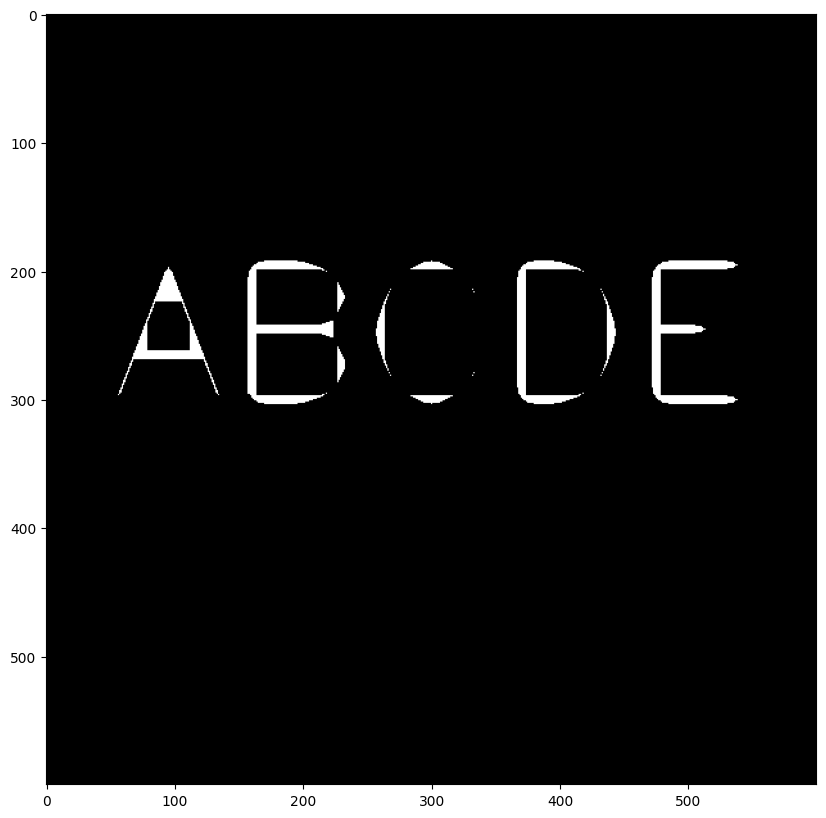

In [8]:
# 흰색이 얇아짐
display_img(result)

In [19]:
img = load_img()

### noise 만들기

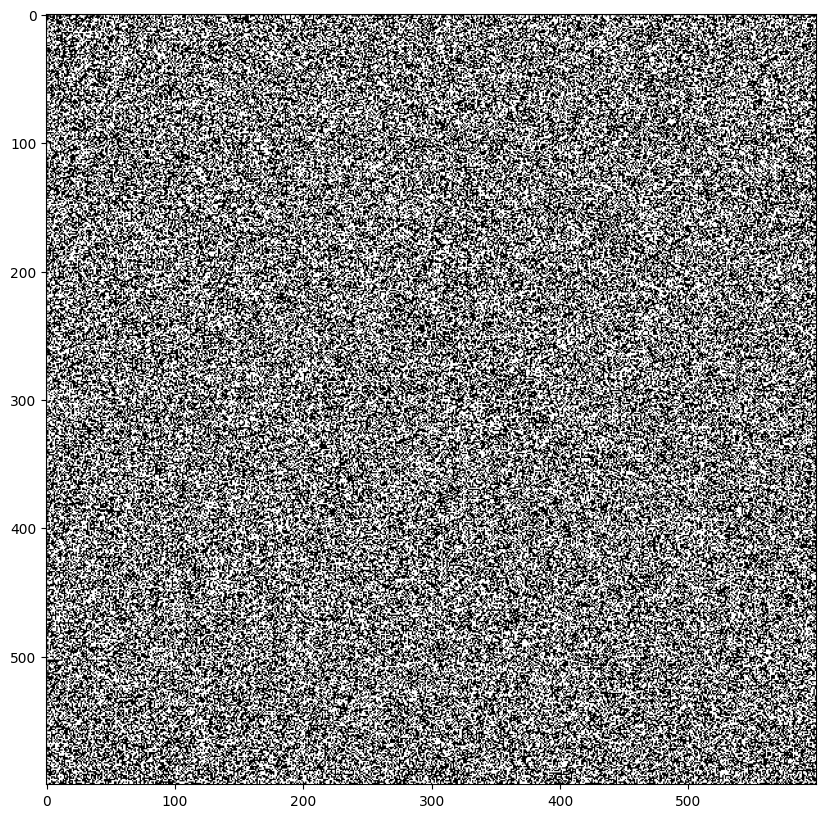

In [20]:
white_noise = np.random.randint(low = 0, high = 2, size = (600,600))*255
display_img(white_noise)

### 살짝 noise 입힌 글자 이미지

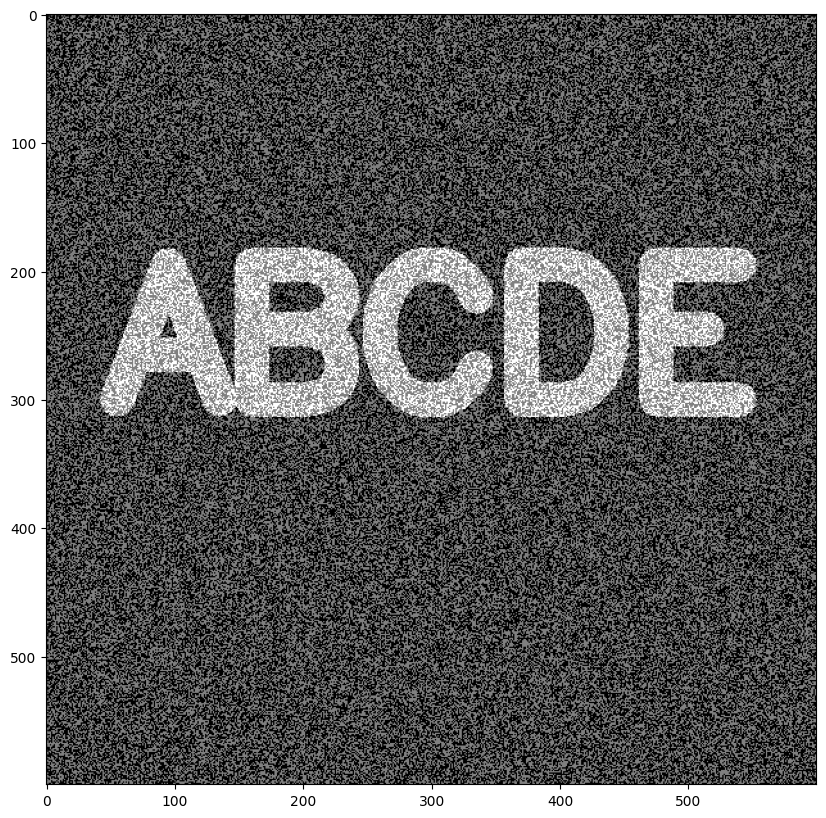

In [21]:
noise_img = white_noise + img
display_img(noise_img)

### Dilation 연산
- 바이너리 이미지에서 흰색 오브젝트의 외곽 픽셀 주변에 1(흰색)으로 추가

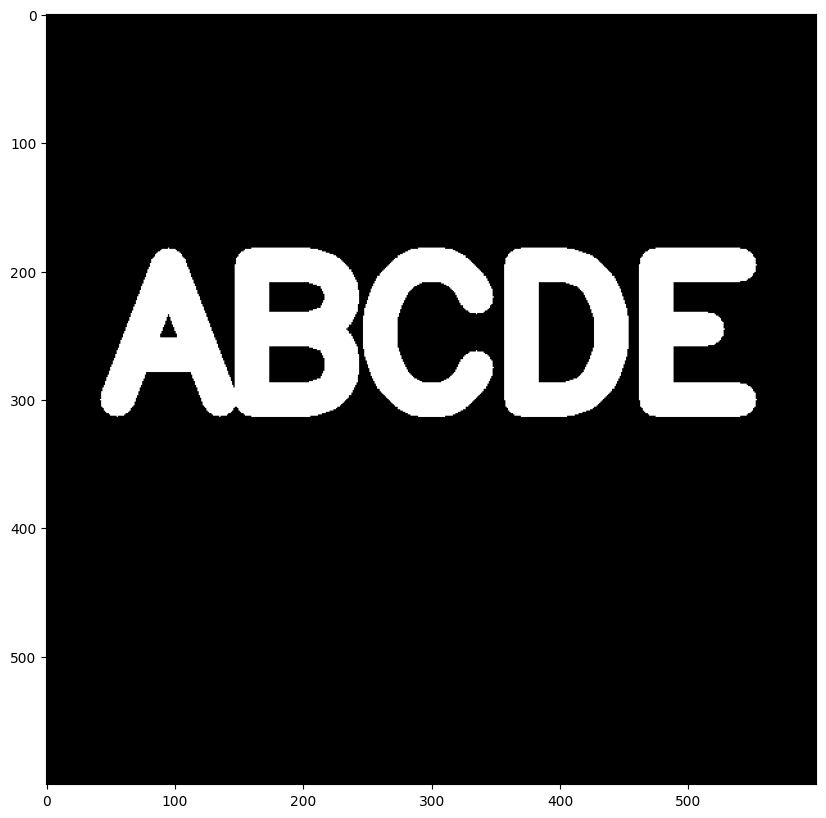

In [22]:
dilate_img = cv2.dilate(noise_img, kernel = kernel)
display_img(img)

### 오프닝 연산을 통한 노이즈 제거

cv2,morphologyEx(src, op, kernel, dst = None, anchor = None, iterations = None, norderType = None, borderValue = None) -> dst

- src : 입력 영상
- op : 모폴로지 연산 플래그
- kernel : 커널
- dst : 출력 영상

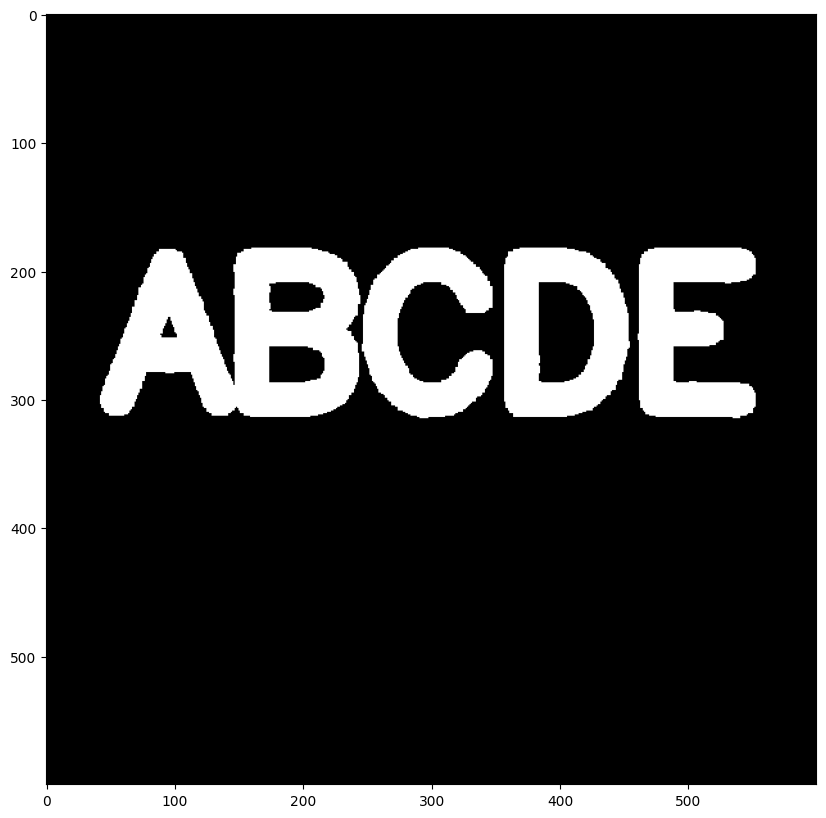

In [23]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

### 클로징 노이즈 만들기

닫기(closing)  ->  팽창(dilation)  ->  침식(erosion)   

- Opening과 반대로 Dilation 연산을 먼저 적용한 후, Erosion 연산을 적용
- 흰색 오브젝트에 있는 작은 검은색 구멍들을 메우는데 사용

In [24]:
img = load_img()

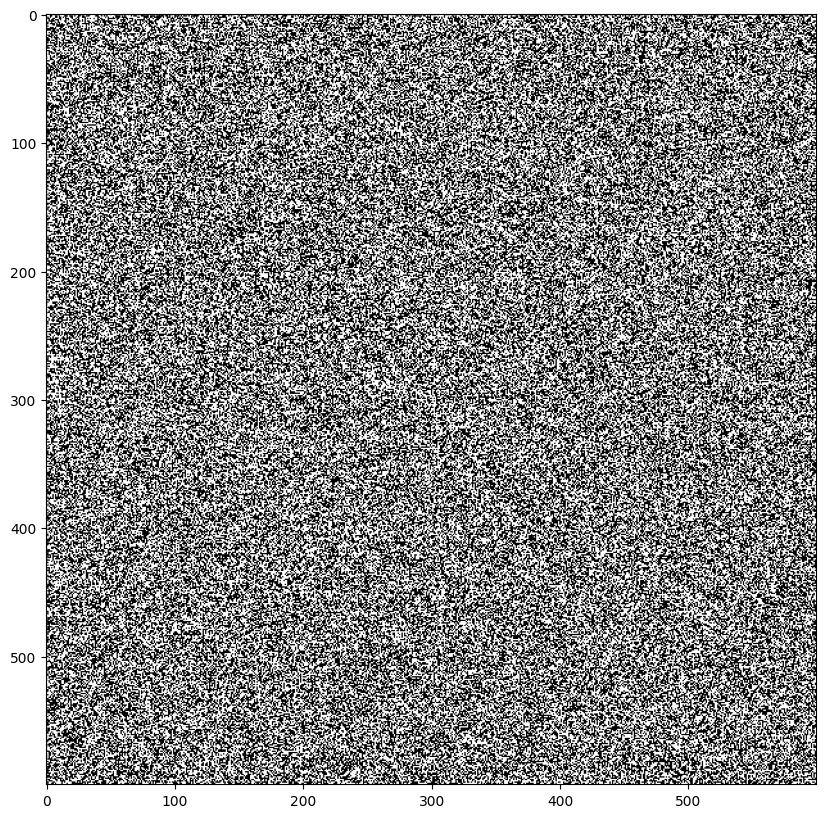

In [25]:
black_noise = np.random.randint(low = 0, high = 2, size = (600,600))
black_noise = black_noise * (-img.max())
display_img(black_noise)

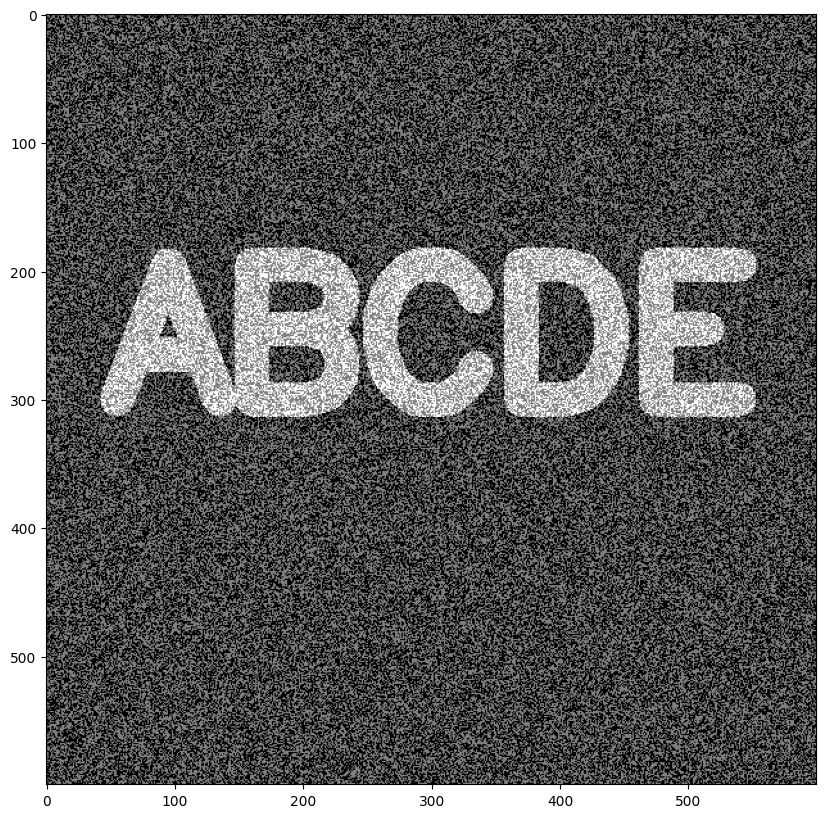

In [26]:
black_noise_img = black_noise + img
display_img(black_noise_img)

In [27]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min()

0.0

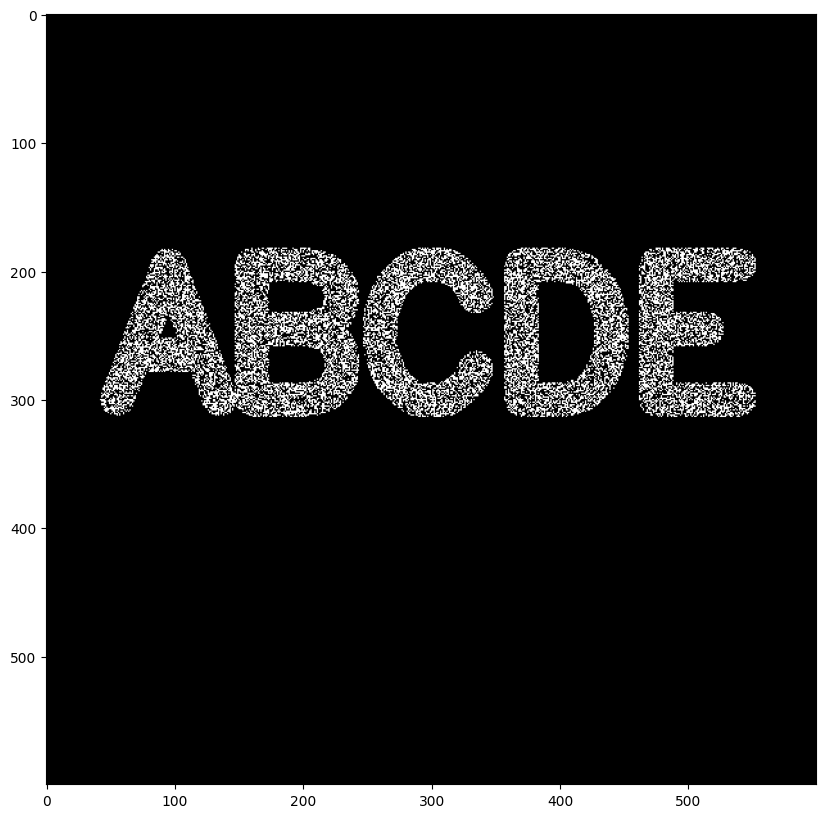

In [28]:
display_img(black_noise_img)

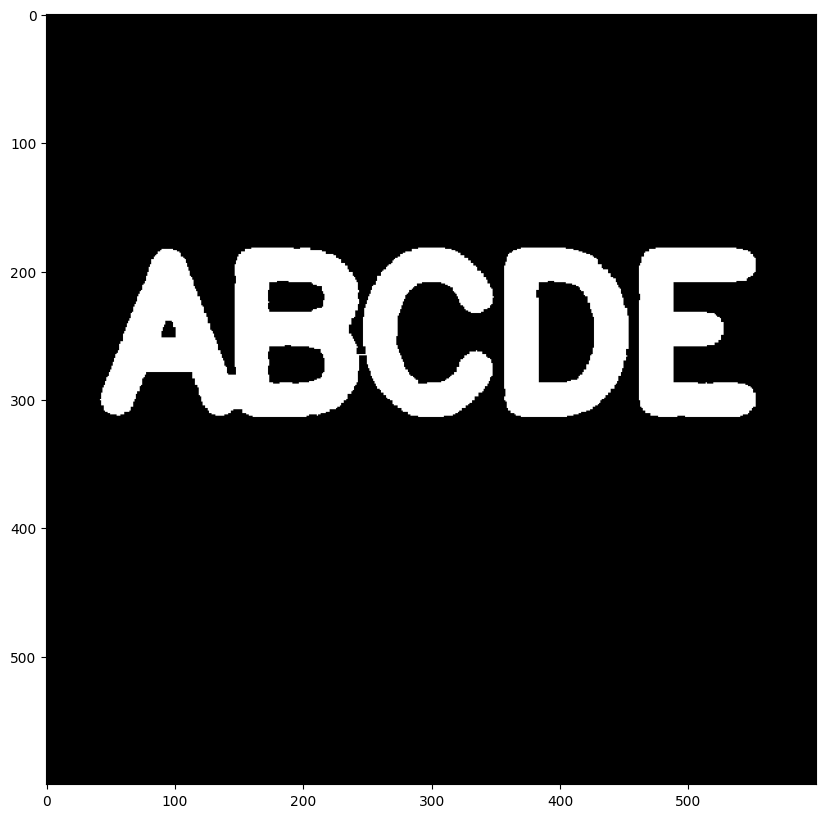

In [29]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)
display_img(closing)

### 그래디언트 연산

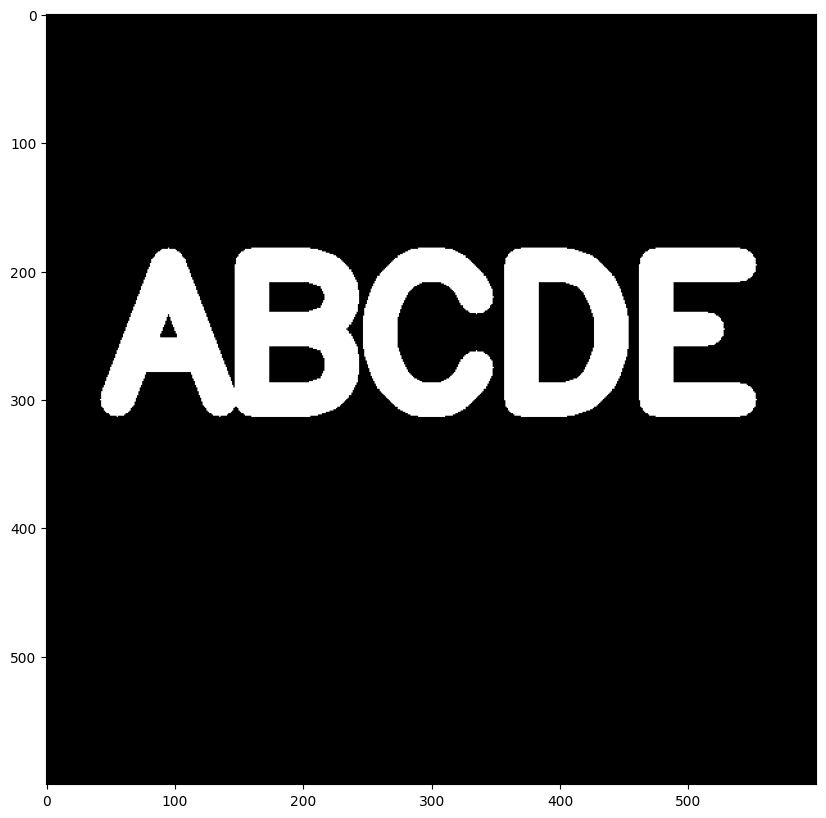

In [30]:
img = load_img()
display_img(img)

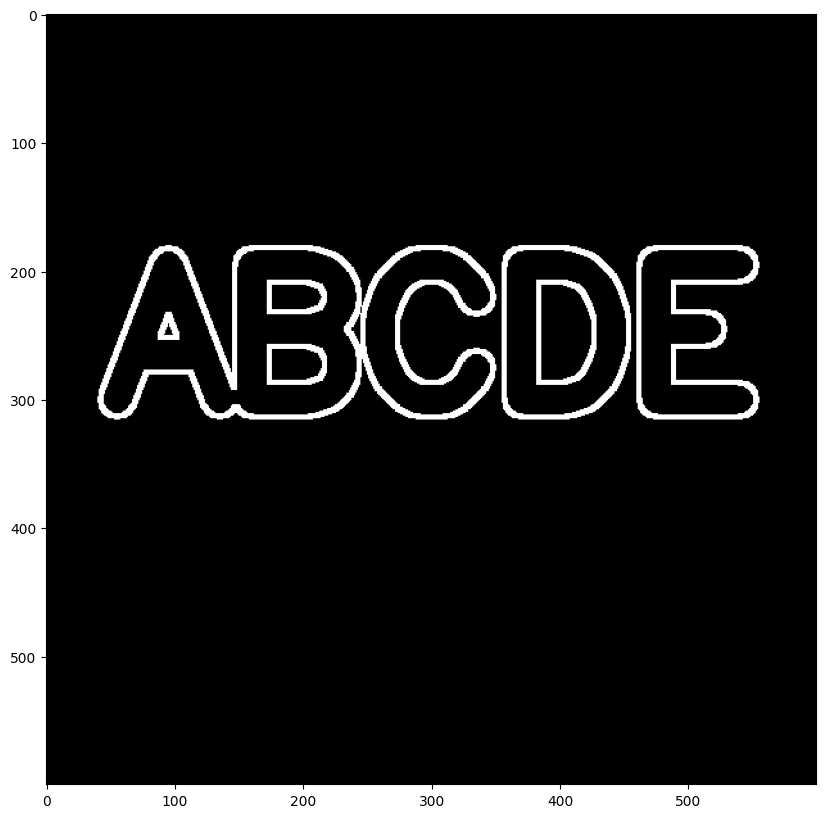

In [31]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT,kernel )
display_img(gradient)

### 그래디언트 중 쇼벨 연산자

In [32]:
def display_img(img):
    fig = plt.figure(figsize = (8,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

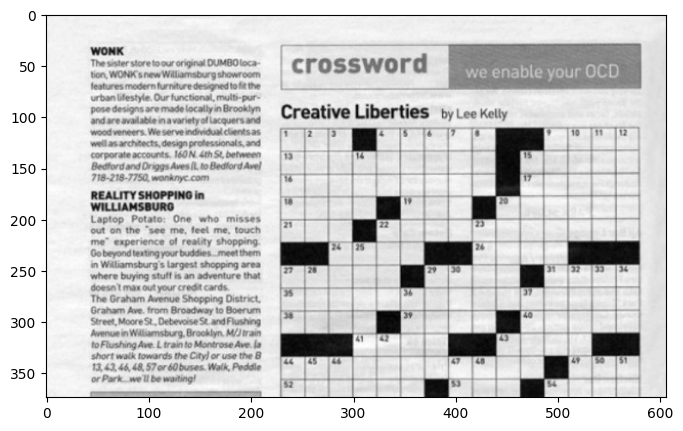

In [34]:
img = cv2.imread('/home/kkyu/amr_ws/opencv/data/crossword.jpg', 0)  # 0 = cv2.IMREAD_GRAYSCALE 같음
display_img(img)


#### x방향 그래디언트

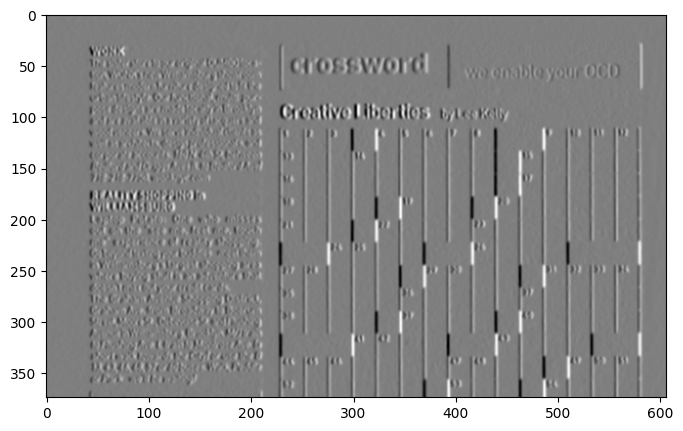

In [35]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx = 1, dy = 0, ksize = 5)
display_img(sobelx)

#### y방향 그래디언트

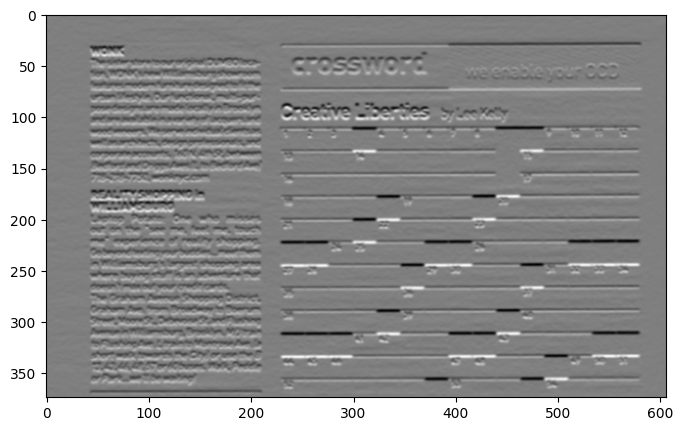

In [37]:
sobely = cv2.Sobel(img, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 5)
display_img(sobely)

#### Laplacian 연산

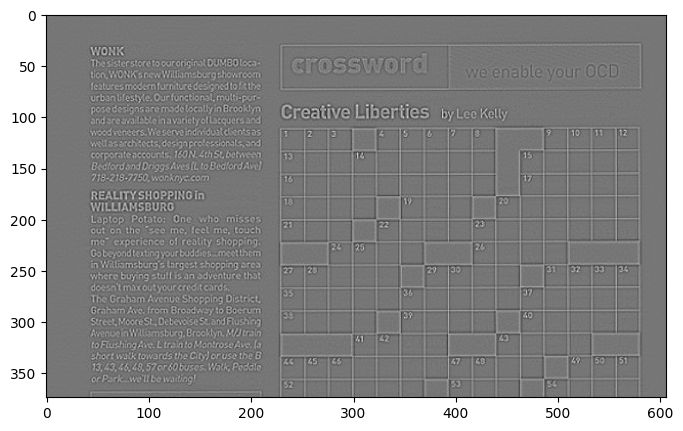

In [38]:
laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F)
display_img(laplacian)

#### x, y 방향의 그래디언트를 합치기

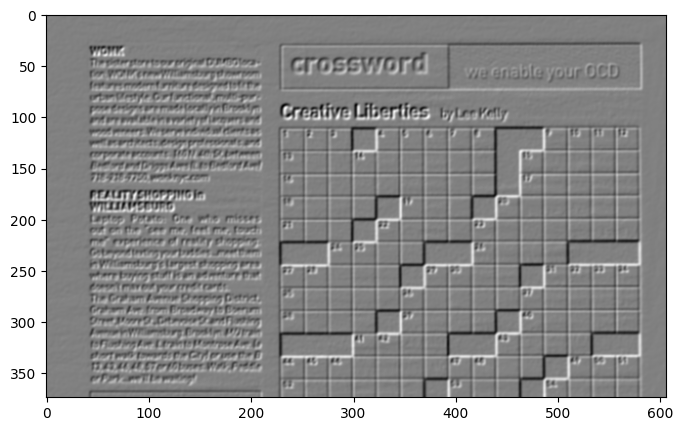

In [39]:
blended = cv2.addWeighted(src1 = sobelx, alpha = 0.5, src2 = sobely, beta = 0.5, gamma = 0)
display_img(blended)

#### threshold : 임계값 함수

cv2.threshold(img, threshold_value, value, flag)

- img : grayscale 이미지
- threshold_value : 문턱값
- value : 픽셀 문턱값보다 클 때 적용되는 최대값
- flag : cv2.THRESH_BINARY -- 픽셀 값이 threshold_value보다 크면 value, 작으면 0으로 할당

- opencv에서 하나의 이미지에 전역으로 적용될 하나의 문턱값을 이용해 thresholing 기능을 제공하는 함수


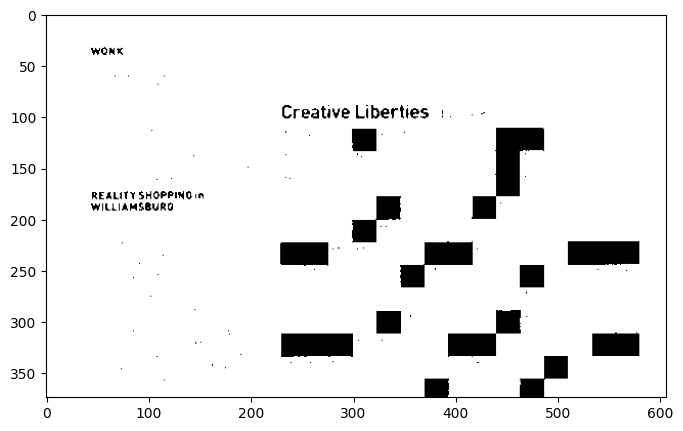

In [45]:
ret, th1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
display_img(th1)

#### 그래디언트 연산으로 모폴로지

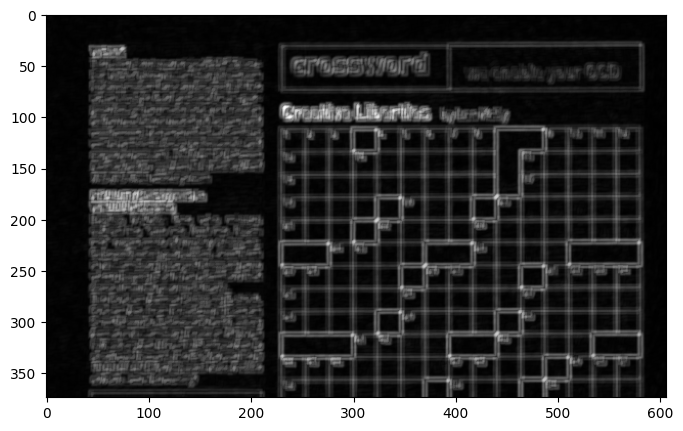

In [42]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)